#### Calculating whether someone gets infected by one of their pre-defined contacts
In a single round, for each row:  

- Make list of people who came in contact and were infected (alpha * beta)
- Remove people who had the vaccine and it was effective (V * theta)

In [6]:
import networkx 
import random
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def QuestionB(rounds, N, gamma, beta, adj_matrix, V, theta, wear_off_rate):

    #round when vaccine introduced to population
    T3= 3
    # Array of Healthy people in population 
    infected = np.zeros((N,),dtype=int)
    # 1st person in the Array of healthy people gets infected 
    infected[1] = 1 
    # Array to monitor the total number of infected people in each round
    total_infected = np.zeros(rounds)
    #current number of sick people in population 
    sick = 1
    #Current number of healthy people in population
    healthy= N - sick

    # before vaccine is introduced
    for i in range(T3):
        infected_index_list = np.nonzero(infected)[0]

         #To Check if the peorson who is infected is still infectious at each round
        for index in infected_index_list:

            #get row in adj matrix of infected person and assign rand nums to their connections
            prob_array = np.asarray(adj_matrix[index]) * np.random.rand(N) 
            new_infected_indices = np.where((prob_array <= (beta*gamma)) & (prob_array != 0))[1] 

            # if the person is healthy and his prob<=infectionrate infect the person
            for j in new_infected_indices:
                if(infected[j]==0):                   
                    infected[j] = 1
                    sick = sick+1
                    healthy=healthy-1
        total_infected[i]= np.sum(infected) 
            
    # after vaccine is introduced
    for i in range(T3, rounds):
        infected_index_list = np.nonzero(infected)[0]

        for index in infected_index_list:
            
            # find people who would have got infected if there was no vaccine
            initial_prob_array = np.asarray(adj_matrix[index]) * np.random.rand(N)
            new_infected_indices = np.where((initial_prob_array <= (beta*gamma)) & 
                                            (initial_prob_array != 0))[1]

            # remove people who got the vaccine and it was effective
            final_prob_array = np.random.rand(len(new_infected_indices))
            indices_vac_saved = np.where((final_prob_array < (V*theta)) & (final_prob_array != 0))[0]
            new_infected_indices = np.delete(new_infected_indices, indices_vac_saved)
            
            
            # if the person is healthy, infect the person
            for j in new_infected_indices:
                if(infected[j]==0):
                    infected[j] = 1
                    sick = sick+1
                    healthy=healthy-1
        total_infected[i]= np.sum(infected)
        
        # VACCINE EFFECTIVNESS DECREASES AFTER EACH ROUND
        theta = theta*wear_off_rate
        
    return total_infected

In [8]:
def graphics(data):
    plt.plot(data)
    plt.ylabel('Total Infected')
    plt.xlabel('Rounds')
    plt.show()

In [9]:
rounds = 1000 #Total number of rounds for simulation
N = 1000      #Total Population
P = .01       #Probability of connection between 2 people
gamma = .05   #Probability that node will contact a connection during round 
beta = .05    # Prob of infection

theta = .9  #initial Effectivness of vaccine
V = .9      #Vaccination rate
V1 = .85
V2 = .5
#Generate G(n,p)
G = networkx.binomial_graph(N, P)
adj_matrix = networkx.linalg.graphmatrix.adjacency_matrix(G).todense()

==========================Question b part 1======================================


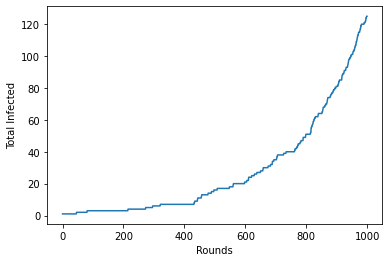

==========================Question b part 2======================================


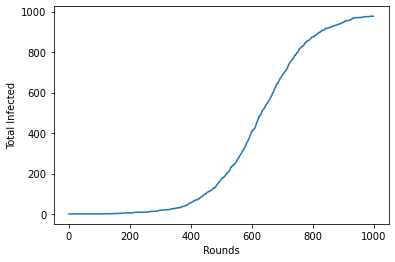

==========================Question C=============================================


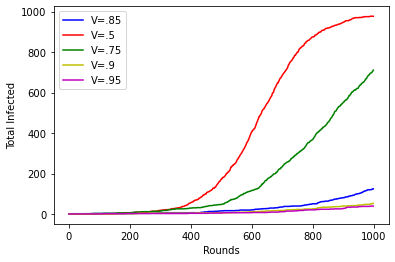

In [26]:
#For Question B part 1 with V = V1 = .85
print("==========================Question b part 1======================================")
wear_off_rate = 1
question_B = QuestionB(rounds, N, gamma, beta, adj_matrix, theta, V1, wear_off_rate )
graphics(question_B)
#For Question B part 2 with V = V1 = .5
print("==========================Question b part 2======================================")
question_B2 = QuestionB(rounds, N, gamma, beta, adj_matrix, theta, V2, wear_off_rate )
graphics(question_B2)
print("==========================Question C=============================================")
results_C = []
Vn = [.75, .90, .95]
results_C.append(question_B)
results_C.append(question_B2)
for i in range(len(Vn)):
    x = QuestionB(rounds, N, gamma, beta, adj_matrix, theta, Vn[i], wear_off_rate )
    results_C.append(x)
    

fig, ax = plt.subplots()
ax.plot(results_C[0], '-b', label='V=.85')
ax.plot(results_C[1], '-r', label='V=.5')
ax.plot(results_C[2], '-g', label='V=.75')
ax.plot(results_C[3], '-y', label='V=.9')
ax.plot(results_C[4], '-m', label='V=.95')
ax.legend(loc='upper left', frameon=True)


plt.ylabel('Total Infected')
plt.xlabel('Rounds')
plt.show()